Dataset Shape: (12316, 32)

Columns:
 Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')


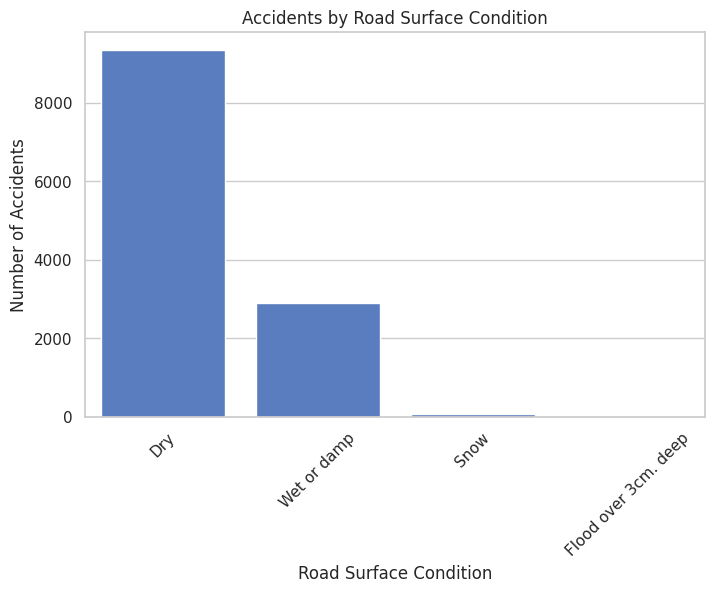

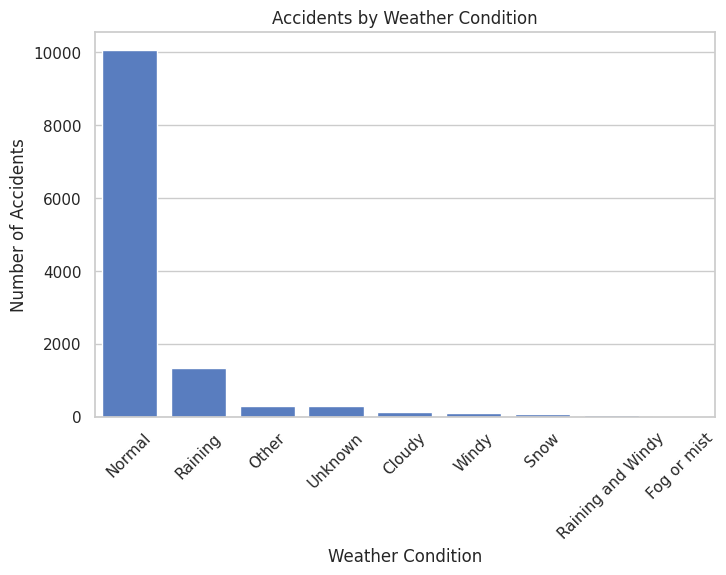

/tmp/ipython-input-2531560732.py:43: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'], errors='coerce').dt.hour


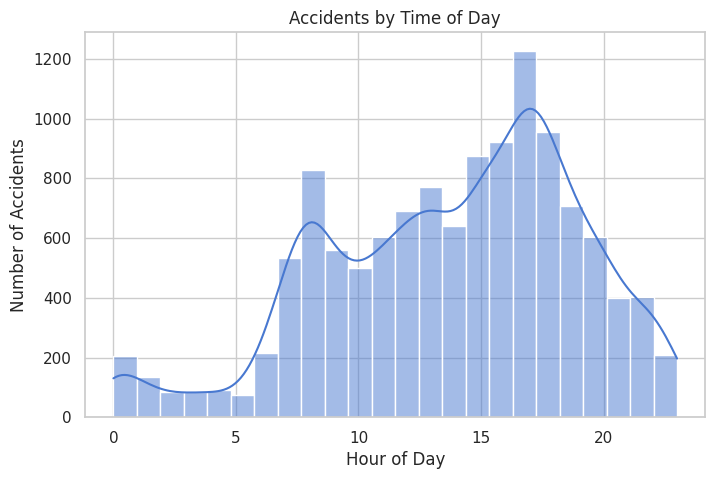

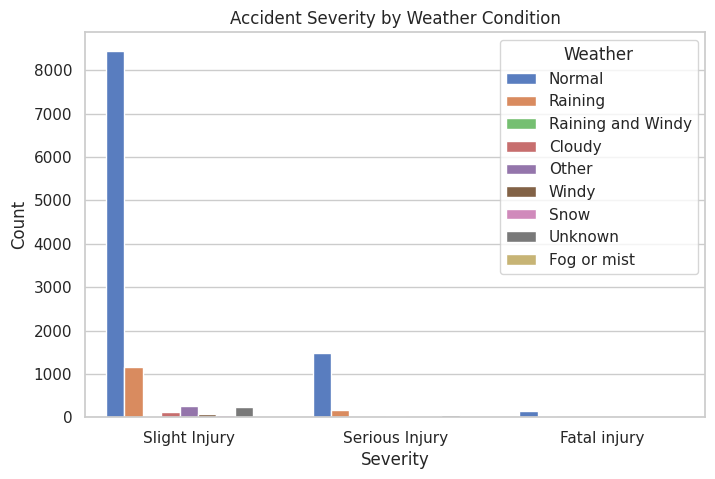


Summary Insights
1. Most common road surface condition for accidents: Dry
2. Weather condition with most accidents: Normal
3. Peak accident hour of the day: 17:00 hrs


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="muted")

# Load dataset
df = pd.read_csv("RTA Dataset.csv")

print("Dataset Shape:", df.shape)
print("\nColumns:\n", df.columns)

# Clean data
df.drop_duplicates(inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

# Accident count by road surface condition
if 'Road_surface_conditions' in df.columns:
    plt.figure(figsize=(8,5))
    sns.countplot(data=df, x='Road_surface_conditions', order=df['Road_surface_conditions'].value_counts().index)
    plt.title('Accidents by Road Surface Condition')
    plt.xlabel('Road Surface Condition')
    plt.ylabel('Number of Accidents')
    plt.xticks(rotation=45)
    plt.show()

# Accident count by weather condition
if 'Weather_conditions' in df.columns:
    plt.figure(figsize=(8,5))
    sns.countplot(data=df, x='Weather_conditions', order=df['Weather_conditions'].value_counts().index)
    plt.title('Accidents by Weather Condition')
    plt.xlabel('Weather Condition')
    plt.ylabel('Number of Accidents')
    plt.xticks(rotation=45)
    plt.show()

# Time of day analysis
if 'Time' in df.columns:
    df['Time'] = pd.to_datetime(df['Time'], errors='coerce').dt.hour
    plt.figure(figsize=(8,5))
    sns.histplot(df['Time'], bins=24, kde=True)
    plt.title('Accidents by Time of Day')
    plt.xlabel('Hour of Day')
    plt.ylabel('Number of Accidents')
    plt.show()

# Severity vs Weather
if {'Accident_severity', 'Weather_conditions'}.issubset(df.columns):
    plt.figure(figsize=(8,5))
    sns.countplot(data=df, x='Accident_severity', hue='Weather_conditions')
    plt.title('Accident Severity by Weather Condition')
    plt.xlabel('Severity')
    plt.ylabel('Count')
    plt.legend(title='Weather')
    plt.show()

# Accident hotspots (if coordinates present)
if {'Latitude', 'Longitude'}.issubset(df.columns):
    plt.figure(figsize=(10,6))
    sns.scatterplot(x='Longitude', y='Latitude', data=df, hue='Accident_severity', alpha=0.6)
    plt.title('Geographical Distribution of Accidents (Hotspots)')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend(title='Severity')
    plt.show()

# Summary Insights
print("\nSummary Insights")
if 'Road_surface_conditions' in df.columns:
    print("1. Most common road surface condition for accidents:", df['Road_surface_conditions'].mode()[0])
if 'Weather_conditions' in df.columns:
    print("2. Weather condition with most accidents:", df['Weather_conditions'].mode()[0])
if 'Time' in df.columns:
    print("3. Peak accident hour of the day:", str(df['Time'].mode()[0]) + ":00 hrs")
